In [1]:
test_scores = {
    'Multiple Linear Regression': [0.64, 0.67],
    'Regularize'
    'Polynomial Regression': [0.73, 0.77],
    'K Nearest Neighbors Regressor': [0.71, 0.79],
    'Decission Tree Regressor': [0.73, 0.79],
    'Voting Regressor with Basic Algorithms': [0.78, 0.83],
    'Bagging with Polynomial Regression': [0.73, 0.77],
    'Random Forest Regressor': [0.80, 0.97],
    'Extremely Randomized Trees': [0.81, 0.99],
    'AdaBoost': [0.64, 0.68],
    'Gradient Boosting Regressor': [0.64, 0.68],
    'Extreme Gradient Boosting': [0.79, 0.96], 
    'Voting Regressor with Ensemble Methods "poly"': [0.8191, 0.9670],
    'Voting Regressor with Ensemble Methods "voting BA"': [0.8198, 0.9695],
    'Voting Regressor with Ensemble Methods': [0.8194, 0.9879],
    'Stacking': [0.8210, 0.9812], 
}

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame(test_scores).transpose()
df.rename(columns={0: 'test', 1: 'train'}, inplace=True)
df

,test,train
Multiple Linear Regression,0.6400,0.6700
RegularizePolynomial Regression,0.7300,0.7700
K Nearest Neighbors Regressor,0.7100,0.7900
Decission Tree Regressor,0.7300,0.7900
Voting Regressor with Basic Algorithms,0.7800,0.8300
Bagging with Polynomial Regression,0.7300,0.7700
Random Forest Regressor,0.8000,0.9700
Extremely Randomized Trees,0.8100,0.9900
AdaBoost,0.6400,0.6800
Gradient Boosting Regressor,0.6400,0.6800


In [10]:
df2 = df.groupby('test')[['test', 'train']].mean()
df2#.columns

,test,train
test,,
0.6400,0.6400,0.676667
0.7100,0.7100,0.790000
0.7300,0.7300,0.776667
0.7800,0.7800,0.830000
0.7900,0.7900,0.960000
0.8000,0.8000,0.970000
0.8100,0.8100,0.990000
0.8191,0.8191,0.967000
0.8194,0.8194,0.987900


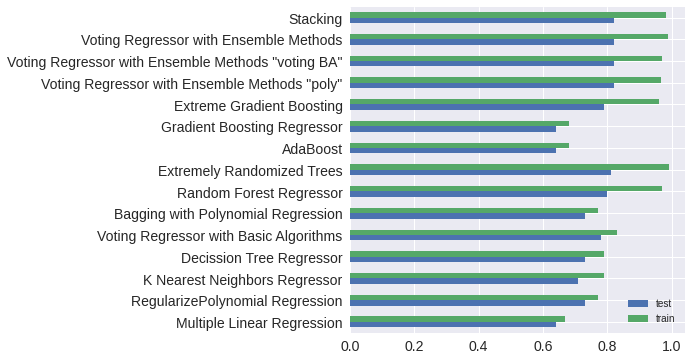

In [7]:
plt.style.use('seaborn')
df.plot(kind='barh', stacked=False, figsize=(6,6), fontsize=14);

In [2]:
import sys

In [3]:
sys.path

['/home/javier/Desktop/potential-investments/A_Study_Of_Potential_Investment_Opportunities_In_The_Irish_Real_Estate_Market_Using_Machine_Learning',
 '/home/javier/anaconda3/envs/tfm/lib/python37.zip',
 '/home/javier/anaconda3/envs/tfm/lib/python3.7',
 '/home/javier/anaconda3/envs/tfm/lib/python3.7/lib-dynload',
 '',
 '/home/javier/anaconda3/envs/tfm/lib/python3.7/site-packages',
 '/home/javier/anaconda3/envs/tfm/lib/python3.7/site-packages/IPython/extensions',
 '/home/javier/.ipython']

Tengo que hacer esto cada vez que abro el proyecto

In [ ]:
def transformer_estimator(num_transformation, regressor, poly_degree=1):

    if num_transformation is 'std_scaler':
        num_pipe = Pipeline([
            ('std_scaler', StandardScaler())
            ('poly', PolynomialFeatures(degree=poly_degree, include_bias=False)),
            ])
    elif num_transformation is 'power_transformer':
        num_pipe = Pipeline([
            ('power_transformer', PowerTransformer(method='yeo-johnson')), #, standardize=False
            ('poly', PolynomialFeatures(degree=poly_degree, include_bias=False)),
            ])    
        

    cat_pipe = Pipeline([
        ('one_hot_encoder', OneHotEncoder(categories=[levels_code, levels_type_house]))  # No hace nada si ya transformadas
                                          #handle_unknown='ignore'
        ])
    # Las transforme antes para evitar problemas no las variables a la hora de predecir e el test_set...

    preprocessor = ColumnTransformer([
        ('num', num_pipe, num_features),
        ('cat', cat_pipe, cat_features),
        ]) #, remainder='passthrough'


    pipe_estimator = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('imputer', SimpleImputer(strategy='constant', # esto lo puedo agnadir en los otros pipes
                                  fill_value=None)),
        ('regressor', LinearRegression())
        ])
    
    return pipe_estimator

In [2]:
df = pd.read_csv('/home/javier/Desktop/Identifyin_Potential_Investment_Opportunities_In_The_Irish_Real_Estate_Market_Using_Machine_Learning/investment-opportunities/data/07_model_output/data_for_frontend.csv')
df.head()

,floor_area,latitude,longitude,bedroom,bathroom,type_house,code,actual_price,predicted_price,residual,res_percentage,url,place
0,253,53.422157,-9.323780,5,4,house,NaN,549000.0,491811.730899,-57188.269101,-0.104168,https://www.daft.ie/for-sale/detached-house-cr...,NaN
1,165,53.231042,-6.648264,4,3,house,W91,495000.0,449712.628846,-45287.371154,-0.091490,https://www.daft.ie/for-sale/detached-house-4-...,Naas
2,131,52.314025,-6.465860,3,2,NaN,Y35,350000.0,293238.559856,-56761.440144,-0.162176,https://www.daft.ie/for-sale/bungalow-st-micha...,Wexford
3,188,52.344317,-6.501705,4,3,house,Y35,450000.0,424775.165162,-25224.834838,-0.056055,https://www.daft.ie/for-sale/detached-house-42...,Wexford
4,73,53.333751,-6.289374,2,1,house,D08,325000.0,354357.760379,29357.760379,0.090332,https://www.daft.ie/for-sale/end-of-terrace-ho...,Dublin 8


In [4]:
[{'label': x, 'value': x} for x in df['place'].fillna('Unknown').unique()]

[{'label': 'Unknown', 'value': 'Unknown'},
 {'label': 'Naas', 'value': 'Naas'},
 {'label': 'Wexford', 'value': 'Wexford'},
 {'label': 'Dublin 8', 'value': 'Dublin 8'},
 {'label': 'Dublin 6W', 'value': 'Dublin 6W'},
 {'label': 'Carrick on Suir', 'value': 'Carrick on Suir'},
 {'label': 'Galway', 'value': 'Galway'},
 {'label': 'Malahide', 'value': 'Malahide'},
 {'label': 'Portlaoise', 'value': 'Portlaoise'},
 {'label': 'Sligo', 'value': 'Sligo'},
 {'label': 'Waterford', 'value': 'Waterford'},
 {'label': 'Miltown Malbay', 'value': 'Miltown Malbay'},
 {'label': 'Greystones', 'value': 'Greystones'},
 {'label': 'Cork city southside', 'value': 'Cork city southside'},
 {'label': 'Knock', 'value': 'Knock'},
 {'label': 'Maynooth', 'value': 'Maynooth'},
 {'label': 'Trim', 'value': 'Trim'},
 {'label': 'Dublin 7', 'value': 'Dublin 7'},
 {'label': 'Dublin 9', 'value': 'Dublin 9'},
 {'label': 'Dublin 20', 'value': 'Dublin 20'},
 {'label': 'Cork city northside', 'value': 'Cork city northside'},
 {'labe

In [9]:
import os.path as path

two_up =  path.abspath(path.join('Untitled.ipynb', "../..")) #"../.."
two_up

'/home/javier/Desktop/Identifyin_Potential_Investment_Opportunities_In_The_Irish_Real_Estate_Market_Using_Machine_Learning/investment-opportunities'

In [3]:
df = pd.read_csv('data/data_predicted.csv')
df.head()

,price,floor_area,latitude,longitude,bedroom,bathroom,type_house,place,predicted_price,residual,res_percentage
0,549000.0,253,53.422157,-9.323780,5,4,house,NaN,483793.908059,-65206.091941,-0.118772
1,495000.0,165,53.231042,-6.648264,4,3,house,Naas,454280.323511,-40719.676489,-0.082262
2,350000.0,131,52.314025,-6.465860,3,2,NaN,Wexford,306115.393629,-43884.606371,-0.125385
3,450000.0,188,52.344317,-6.501705,4,3,house,Wexford,421523.614511,-28476.385489,-0.063281
4,325000.0,73,53.333751,-6.289374,2,1,house,Dublin 8,359277.301913,34277.301913,0.105469


In [19]:
df2 = df['place'].unique()

In [24]:
def cities(place):
    if type(place) is not str:
        return 'Unknown'
    elif ('Dublin' in place) or ('Blackrock' in place) or ('Dun Laoghaire' in place):
        return 'Dublin'
    else:
        return place


df['city'] = df['place'].apply(cities)

In [25]:
df.head()

,price,floor_area,latitude,longitude,bedroom,bathroom,type_house,place,predicted_price,residual,res_percentage,city
0,549000.0,253,53.422157,-9.323780,5,4,house,NaN,483793.908059,-65206.091941,-0.118772,Unknown
1,495000.0,165,53.231042,-6.648264,4,3,house,Naas,454280.323511,-40719.676489,-0.082262,Naas
2,350000.0,131,52.314025,-6.465860,3,2,NaN,Wexford,306115.393629,-43884.606371,-0.125385,Wexford
3,450000.0,188,52.344317,-6.501705,4,3,house,Wexford,421523.614511,-28476.385489,-0.063281,Wexford
4,325000.0,73,53.333751,-6.289374,2,1,house,Dublin 8,359277.301913,34277.301913,0.105469,Dublin


In [23]:
[{'label': f'{city}'} for city in df['place'].unique()]

[{'label': 'nan'},
 {'label': 'Naas'},
 {'label': 'Wexford'},
 {'label': 'Dublin 8'},
 {'label': 'Dublin 6W'},
 {'label': 'Carrick on Suir'},
 {'label': 'Galway'},
 {'label': 'Malahide'},
 {'label': 'Portlaoise'},
 {'label': 'Sligo'},
 {'label': 'Waterford'},
 {'label': 'Miltown Malbay'},
 {'label': 'Greystones'},
 {'label': 'Cork city southside'},
 {'label': 'Knock'},
 {'label': 'Maynooth'},
 {'label': 'Trim'},
 {'label': 'Dublin 7'},
 {'label': 'Dublin 9'},
 {'label': 'Dublin 20'},
 {'label': 'Cork city northside'},
 {'label': 'Dublin 15'},
 {'label': 'Tullamore'},
 {'label': 'Midleton'},
 {'label': 'Kells'},
 {'label': 'Dublin 6'},
 {'label': 'Dunshaughlin'},
 {'label': 'Dundalk'},
 {'label': 'Balbriggan'},
 {'label': 'Swords'},
 {'label': 'Kilkenny'},
 {'label': 'Dunmanway'},
 {'label': 'Drogheda'},
 {'label': 'Bandon'},
 {'label': 'Dublin 13'},
 {'label': 'Rylane'},
 {'label': 'Limerick'},
 {'label': 'Dublin 18'},
 {'label': 'Dublin 11'},
 {'label': 'Carrick On Shannon'},
 {'label

In [2]:
import re

In [28]:
string = '{ "points": [ { "curveNumber": 0, "pointNumber": 4184, "pointIndex": 4184, "lon": -6.403226, "lat": 53.362621, "hovertext": -56632, "marker.size": 350000, "marker.color": -0.1618066044796388, "bbox": { "x0": 1026.3924084752466, "x1": 1034.1017510064974, "y0": 634.3854952326058, "y1": 642.0948377638565 }, "customdata": 350000, 293368, 53.362621, -6.403226, -0.1618066044796388, -56632, "https://www.daft.ie/for-sale/semi-detached-house-2-silvermount-cottages-strawberry-beds-co-dublin/3547377" } ] }'

In [42]:
dd = re.search(r'(https:).+', string)
dd

<re.Match object; span=(388, 500), match='https://www.daft.ie/for-sale/semi-detached-house->

In [46]:
dd

<re.Match object; span=(388, 500), match='https://www.daft.ie/for-sale/semi-detached-house->

In [34]:
dd.string

AttributeError: 'NoneType' object has no attribute 'string'

In [29]:
string

'{ "points": [ { "curveNumber": 0, "pointNumber": 4184, "pointIndex": 4184, "lon": -6.403226, "lat": 53.362621, "hovertext": -56632, "marker.size": 350000, "marker.color": -0.1618066044796388, "bbox": { "x0": 1026.3924084752466, "x1": 1034.1017510064974, "y0": 634.3854952326058, "y1": 642.0948377638565 }, "customdata": 350000, 293368, 53.362621, -6.403226, -0.1618066044796388, -56632, "https://www.daft.ie/for-sale/semi-detached-house-2-silvermount-cottages-strawberry-beds-co-dublin/3547377" } ] }'

In [48]:
None is None

True

In [51]:
dd.group().split('"')[0]

'https://www.daft.ie/for-sale/semi-detached-house-2-silvermount-cottages-strawberry-beds-co-dublin/3547377'

In [22]:
sale = pd.read_csv('/home/javier/Desktop/Identifyin_Potential_Investment_Opportunities_In_The_Irish_Real_Estate_Market_Using_Machine_Learning/investment-opportunities/notebooks/data/sale_post_geosp_fe.csv')
kedro = pd.read_csv('/home/javier/Desktop/Identifyin_Potential_Investment_Opportunities_In_The_Irish_Real_Estate_Market_Using_Machine_Learning/investment-opportunities/data/04_feature/ads_with_location_features_and_geonames.csv')

In [23]:
print(sale.shape)
print(kedro.shape)

(7661, 24)
(7344, 26)


In [24]:
list(sale.columns)

['daft_id',
 'url',
 'name',
 'price',
 'sale_type',
 'floor_area',
 'psr',
 'ber',
 'entered_renewed',
 'views',
 'type_house',
 'type',
 'scraping_date',
 'description',
 'latitude',
 'longitude',
 'bedroom',
 'bathroom',
 'plus_info',
 'postcode',
 'state_district',
 'city_district',
 'place',
 'code']

In [25]:
list(kedro.columns)

['daft_id',
 'url',
 'name',
 'price',
 'sale_type',
 'floor_area',
 'psr',
 'ber',
 'entered_renewed',
 'views',
 'type_house',
 'type',
 'scraping_date',
 'description',
 'latitude',
 'longitude',
 'bedroom',
 'bathroom',
 'plus_info',
 'postcode',
 'state_district',
 'city_district',
 'place',
 'code',
 'admin1',
 'place_coordinates']

In [26]:
kedro.sample(5)

,daft_id,url,name,price,sale_type,floor_area,psr,ber,entered_renewed,views,...,bedroom,bathroom,plus_info,postcode,state_district,city_district,place,code,admin1,place_coordinates
5258,16139381,https://www.daft.ie/for-sale/detached-house-hi...,"Hillview, Rathmoy, Borrisoleigh, Co. Tipperary",120000.0,For Sale by Private Treaty,88,1219.0,D2,10/09/2021,9007.0,...,2,1,Detached,NaN,Munster,Borrisoleigh,NaN,NaN,NaN,NaN
4991,16194195,https://www.daft.ie/for-sale/semi-detached-hou...,"8 An Corran, Oram, Castleblayney, Co. Monaghan",195000.0,For Sale by Private Treaty,122,4174.0,C3,17/11/2021,2856.0,...,4,2,Semi-D,NaN,NaN,Church Hill ED,NaN,NaN,NaN,NaN
1163,16977593,https://www.daft.ie/for-sale/semi-detached-hou...,"43 Fort Hill, Moneygurney, Douglas, Co. Cork",300000.0,For Sale by Private Treaty,99,1430.0,B3,24/11/2021,4159.0,...,3,3,Semi-D,T12 ND82,Munster,Ballincollig - Carrigaline,Cork city southside,T12,Munster,51.873/-8.49
4039,16411107,https://www.daft.ie/for-sale/terraced-house-12...,"12 Heytesbury Street, Portobello, Dublin 8",950000.0,For Sale by Private Treaty,254,3320.0,SI_666,03/11/2021,8062.0,...,5,7,Terrace,D08 DR60,Leinster,Wood Quay B ED,Dublin 8,D08,Leinster,53.335/-6.273
3161,16613886,https://www.daft.ie/for-sale/terraced-house-47...,"47 Main Street, Howth, Dublin 13",375000.0,For Sale by Private Treaty,64,4017.0,F,21/10/2021,6520.0,...,2,1,Terrace,D13 X4W0,Leinster,Howth ED,Dublin 13,D13,Leinster,53.395/-6.149


In [27]:
kedrofe = pd.read_csv('/home/javier/Desktop/Identifyin_Potential_Investment_Opportunities_In_The_Irish_Real_Estate_Market_Using_Machine_Learning/investment-opportunities/data/04_feature/ads_with_location_features.csv')

In [13]:
kedrofe.shape

(7344, 22)

In [14]:
list(kedrofe.columns)

['daft_id',
 'url',
 'name',
 'price',
 'sale_type',
 'floor_area',
 'psr',
 'ber',
 'entered_renewed',
 'views',
 'type_house',
 'type',
 'scraping_date',
 'description',
 'latitude',
 'longitude',
 'bedroom',
 'bathroom',
 'plus_info',
 'postcode',
 'state_district',
 'city_district']

In [17]:
kedro['Unnamed: 0'].max()

138.0

In [36]:
sale = pd.read_csv('/home/javier/Desktop/Identifyin_Potential_Investment_Opportunities_In_The_Irish_Real_Estate_Market_Using_Machine_Learning/investment-opportunities/notebooks/data/selected_data.csv')
kedro = pd.read_csv('/home/javier/Desktop/Identifyin_Potential_Investment_Opportunities_In_The_Irish_Real_Estate_Market_Using_Machine_Learning/investment-opportunities/data/05_model_input/model_input.csv')

In [37]:
print(sale.shape)
print(kedro.shape)

(7344, 9)
(7344, 26)


In [38]:
kedro = kedro.loc[:, [
        'price',
        'floor_area',
        # 'views',
        'latitude',
        'longitude',
        'bedroom',
        'bathroom',
        # 'sale_type',
        'type_house',
        # 'postcode',
        # 'state_district',
        # 'county',
        # 'city_district',
        # 'road',
        'place',
        # 'code',
        # 'admin1',
        # 'cities'
    ]].copy()

In [39]:
kedro.shape

(7344, 8)

In [42]:
sale.columns.tolist()

['price',
 'floor_area',
 'bedroom',
 'bathroom',
 'place',
 'type_house',
 'longitude',
 'latitude',
 'city_district']

In [43]:
kedro.columns.tolist()

['price',
 'floor_area',
 'latitude',
 'longitude',
 'bedroom',
 'bathroom',
 'type_house',
 'place']

In [49]:
(sale['place'] == kedro['place']).sum()

6129

In [46]:
sale['place'].head()

0         NaN
1        Naas
2     Wexford
3     Wexford
4    Dublin 8
Name: place, dtype: object

In [47]:
kedro['place'].head()

0         NaN
1        Naas
2     Wexford
3     Wexford
4    Dublin 8
Name: place, dtype: object

In [50]:
sale.shape

(7344, 9)

In [51]:
7344 - 6129

1215

In [56]:
sale.place.isna().index

RangeIndex(start=0, stop=7344, step=1)

In [57]:
kedro.place.isna().index

RangeIndex(start=0, stop=7344, step=1)

In [59]:
(sale.place.isna().index == kedro.place.isna().index).sum()

7344

In [65]:
import numpy as np

In [73]:
thelist = sale[sale['place'] != kedro['place']].place.index.tolist()

In [77]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [87]:
sale.loc[thelist][sale.loc[thelist].place.str.contains('Dublin').notna()].index.tolist()

[1256, 3241, 3956, 4509, 4740, 6766, 7172]

In [95]:
sale.columns

Index(['price', 'floor_area', 'bedroom', 'bathroom', 'place', 'type_house',
       'longitude', 'latitude', 'city_district'],
      dtype='object')

In [96]:
sale.loc[[1256, 3241, 3956, 4509, 4740, 6766, 7172]]

,price,floor_area,bedroom,bathroom,place,type_house,longitude,latitude,city_district
1256,495000.0,108,3,1,Dublin 13,house,-6.174588,53.387104,Howth ED
3241,695000.0,103,3,2,Dublin 1,apartment,-6.237414,53.345221,NaN
3956,350000.0,94,3,1,Dublin 17,house,-6.185688,53.385177,Edenmore ED
4509,275000.0,71,2,2,Dublin 17,house,-6.181611,53.386520,Edenmore ED
4740,475000.0,94,3,2,Dublin 13,house,-6.174171,53.388538,Grange E ED
6766,285000.0,53,1,1,Dublin 8,apartment,-6.268618,53.345125,Royal Exchange A ED
7172,595000.0,91,3,2,Dublin 1,apartment,-6.236190,53.345461,NaN


In [97]:
kedro.loc[[1256, 3241, 3956, 4509, 4740, 6766, 7172]]

,price,floor_area,latitude,longitude,bedroom,bathroom,type_house,place
1256,495000.0,108,53.387104,-6.174588,3,1,house,Dublin 5
3241,695000.0,103,53.345221,-6.237414,3,2,apartment,Dublin 2
3956,350000.0,94,53.385177,-6.185688,3,1,house,Dublin 5
4509,275000.0,71,53.386520,-6.181611,2,2,house,Dublin 5
4740,475000.0,94,53.388538,-6.174171,3,2,house,Dublin 5
6766,285000.0,53,53.345125,-6.268618,1,1,apartment,Dublin 2
7172,595000.0,91,53.345461,-6.236190,3,2,apartment,Dublin 2


In [4]:
from daftpy.daftfeanalysis import drop_outliers

In [10]:
data = pd.read_csv('/home/javier/Desktop/Identifyin_Potential_Investment_Opportunities_In_The_Irish_Real_Estate_Market_Using_Machine_Learning/investment-opportunities/notebooks/data/sale_post_geosp_fe.csv')
data.shape

(7661, 24)

In [11]:
ssss = drop_outliers(data)

PRICE
Range before: [32000.0, 10000000.0]

Limits: [-155000.0, 2650000.0]
No outliers: 7587
Outliers: 74

Range after: [32000.0, 10000000.0]
-----------
FLOOR_AREA
Range before: [1, 10279]

Limits: [40.0, 628.1999999999971]
No outliers: 7513
Outliers: 148

Range after: [1, 10279]
-----------
VIEWS
Range before: [0.0, 125030.0]

Limits: [-6010.5, 37978.59999999989]
No outliers: 7584
Outliers: 77

Range after: [0.0, 125030.0]
-----------
BEDROOM
Range before: [1, 43]

Limits: [1, 8.0]
No outliers: 7608
Outliers: 53

Range after: [1, 43]
-----------
BATHROOM
Range before: [1, 47]

Limits: [1, 7.0]
No outliers: 7594
Outliers: 67

Range after: [1, 47]
-----------
---------------
Shape before: (7661, 24)
Shape after: (7344, 24)
Outliers dropped: 317


In [12]:
ssss.shape

(7344, 24)

In [13]:
ssss.to_csv('/home/javier/Desktop/losdatos.csv')

In [14]:
ssss.head()

,daft_id,url,name,price,sale_type,floor_area,psr,ber,entered_renewed,views,...,latitude,longitude,bedroom,bathroom,plus_info,postcode,state_district,city_district,place,code
0,16790866,https://www.daft.ie/for-sale/detached-house-cr...,"Cregg, Oughterard, Co. Galway",549000.0,For Sale by Private Treaty,253,1512.0,C1,2021-11-24,19546.0,...,53.422157,-9.323780,5,4,Detached,NaN,Connacht,Oughterard ED,NaN,NaN
1,16233668,https://www.daft.ie/for-sale/detached-house-4-...,"4 Gleann Na Riogh Drive, Naas, Co. Kildare",495000.0,For Sale by Private Treaty,165,1393.0,C3,2021-11-23,9863.0,...,53.231042,-6.648264,4,3,Detached,W91 X67A,Leinster,Naas Urban ED,Naas,W91
2,16451539,https://www.daft.ie/for-sale/bungalow-st-micha...,"St Michaels, Rocksborough, Wexford Town, Co. W...",350000.0,For Sale by Private Treaty,131,1313.0,D2,2021-11-24,6719.0,...,52.314025,-6.465860,3,2,Bungalow,Y35 E77E,Leinster,Wexford Rural ED,Wexford,Y35
3,16232577,https://www.daft.ie/for-sale/detached-house-42...,"42 Ard Na Slaine, Newtown Road, Wexford Town, ...",450000.0,For Sale by Private Treaty,188,1313.0,A2,2021-11-24,3955.0,...,52.344317,-6.501705,4,3,Detached,Y35 K0WC,Leinster,Wexford Rural ED,Wexford,Y35
4,16624813,https://www.daft.ie/for-sale/end-of-terrace-ho...,"11 Reilly's Avenue, Cork Street, Dolphin's Bar...",325000.0,For Sale by Private Treaty,73,4004.0,C3,2021-11-24,5601.0,...,53.333751,-6.289374,2,1,End of Terrace,D08 N2X7,Leinster,NaN,Dublin 8,D08
